In [8]:
import datetime
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
from IPython.display import clear_output
import pprint
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from itertools import permutations
import itertools

In [2]:
team_data = pd.read_csv(r"C:\Users\Terrafirma\OwnLearning\PremierLeague\team_stats.csv")
player_data = pd.read_csv(r"C:\Users\Terrafirma\OwnLearning\PremierLeague\player_stats.csv")
team_data.drop("Unnamed: 0", axis=1, inplace=True)
player_data.drop("Unnamed: 0", axis=1, inplace=True)
player_data['ROI'] = round(player_data['ROI'], 3)
player_data = player_data.merge(team_data, left_on='Team', right_on='Team')

In [3]:
def star_players(df=player_data, no_of_players=3):
    return df.sort_values('Pts', ascending=False)[:no_of_players]

star_players()

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
261,Liverpool,Salah,MID,13.1,73.5,7.2,160.0,12.214,92.9,3.1,0.3,68.425,1.925,0.900,9.53,2.200,0.156
262,Liverpool,Alexander-Arnold,DEF,8.2,42.6,7.3,108.0,13.171,92.9,3.1,0.3,68.425,1.925,0.900,9.53,2.200,0.156
174,Crystal Palace,Gallagher,MID,6.2,28.3,4.2,87.0,14.032,71.8,1.9,0.7,65.200,1.775,0.875,6.19,1.025,0.394


In [133]:
shortlist_best_keeper()

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
435,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,0.6,76.450,2.100,0.625,4.44,1.075,0.286
0,Arsenal,Ramsdale,GKP,5.1,16.7,4.0,70.0,13.725,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
29,Aston Villa,Martínez,GKP,5.5,13.6,3.8,67.0,12.182,73.4,2.0,0.7,72.575,2.050,0.775,5.36,1.225,0.341
266,Liverpool,Alisson,GKP,6.0,8.2,4.8,72.0,12.000,92.9,3.1,0.3,68.425,1.925,0.900,9.53,2.200,0.156
176,Crystal Palace,Guaita,GKP,4.6,8.9,1.8,54.0,11.739,71.8,1.9,0.7,65.200,1.775,0.875,6.19,1.025,0.394


In [200]:
def choose_best_keeper(df=shortlist_best_keeper()):
    # team stats is actually v weak- don't include
    # ROI is the most important thing
    # Points is also super imporant (we don't want a v cheap GK w only decent points)
    # ratio is 75/25 to ROI/points
    df = df.reset_index()

    mean_pts= sum(df['Pts']) / len(df)
    mean_ROI = sum(df['ROI']) / len(df)
        
    df['norm_pts'] = round(df['Pts'] / mean_pts,3)
    df['norm_ROI'] = round(df['ROI'] / mean_ROI,3)
    df['selection_score'] = df['norm_pts'] * 0.35 + df['norm_ROI'] * 0.65
    print(f"selected 1st goalkeeper: {df.iloc[0]['Player']} ({df.iloc[0]['Team']})")
    return df.sort_values('selection_score', ascending=False)
        
choose_best_keeper()

selected 1st goalkeeper: Sá (Wolves)


,index,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,...,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood,norm_pts,norm_ROI,selection_score
0,435,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,...,0.6,76.450,2.100,0.625,4.44,1.075,0.286,1.063,1.095,1.08380
1,0,Arsenal,Ramsdale,GKP,5.1,16.7,4.0,70.0,13.725,77.9,...,0.6,68.600,1.800,0.775,6.70,1.325,0.333,1.048,1.080,1.06880
3,266,Liverpool,Alisson,GKP,6.0,8.2,4.8,72.0,12.000,92.9,...,0.3,68.425,1.925,0.900,9.53,2.200,0.156,1.078,0.944,0.99090
2,29,Aston Villa,Martínez,GKP,5.5,13.6,3.8,67.0,12.182,73.4,...,0.7,72.575,2.050,0.775,5.36,1.225,0.341,1.003,0.958,0.97375
4,176,Crystal Palace,Guaita,GKP,4.6,8.9,1.8,54.0,11.739,71.8,...,0.7,65.200,1.775,0.875,6.19,1.025,0.394,0.808,0.923,0.88275


In [117]:
GKPs = player_data[player_data['Position'] == 'GKP'].sort_values('Pts', ascending=False)
GKPs

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
266,Liverpool,Alisson,GKP,6.0,8.2,4.8,72.0,12.000,92.9,3.1,0.3,68.425,1.925,0.900,9.53,2.200,0.156
435,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,0.6,76.450,2.100,0.625,4.44,1.075,0.286
0,Arsenal,Ramsdale,GKP,5.1,16.7,4.0,70.0,13.725,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
148,Chelsea,Mendy,GKP,6.3,18.8,2.5,68.0,10.794,88.7,2.6,0.4,72.625,1.875,0.650,8.13,1.950,0.213
29,Aston Villa,Martínez,GKP,5.5,13.6,3.8,67.0,12.182,73.4,2.0,0.7,72.575,2.050,0.775,5.36,1.225,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Crystal Palace,Matthews,GKP,4.0,0.2,0.0,0.0,0.000,71.8,1.9,0.7,65.200,1.775,0.875,6.19,1.025,0.394
229,Everton,Virgínia,GKP,4.0,1.0,0.0,0.0,0.000,69.1,1.9,0.8,71.425,2.050,0.825,5.10,1.075,0.390
231,Everton,Tyrer,GKP,4.0,0.0,0.0,0.0,0.000,69.1,1.9,0.8,71.425,2.050,0.825,5.10,1.075,0.390
255,Leicester,Ward,GKP,4.0,4.5,0.0,0.0,0.000,72.2,2.1,0.9,82.375,2.500,0.500,3.84,1.600,0.360


In [ ]:
# a formula to shortlist a certain number of players - maybe 50 and find highest scoring

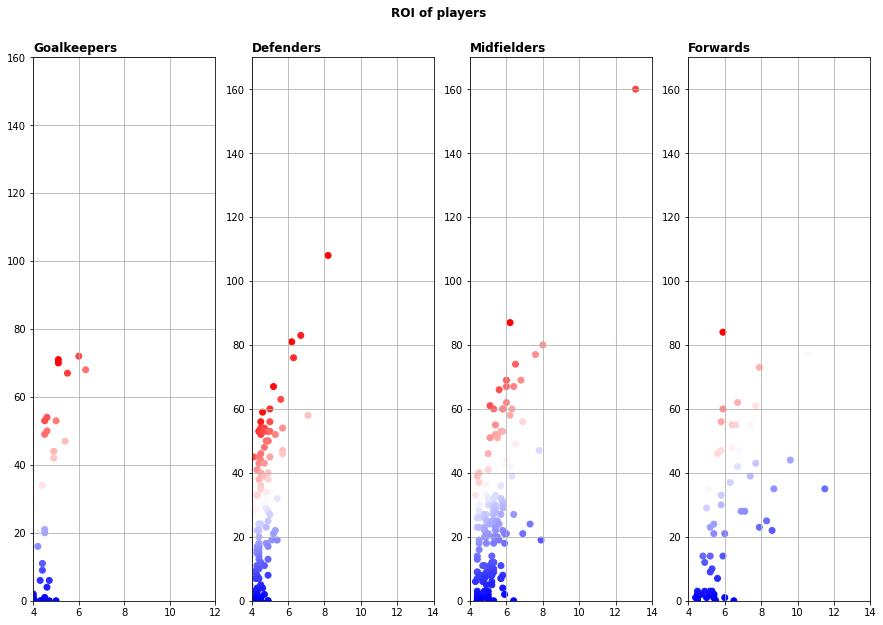

In [68]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,10))
fig.suptitle('ROI of players', y=0.95, weight='bold')

GKPs = player_data[player_data['Position'] == 'GKP'].sort_values('ROI', ascending=False)
X = GKPs['Cost']
Y = GKPs['Pts']
C = GKPs['ROI']
ax1.set_xlim(4, 12)
ax1.set_ylim(0, 160)
ax1.grid()
ax1.set_title("Goalkeepers", loc='left', weight='bold')
ax1.scatter(X, Y, c=C, cmap='bwr')

DEF = player_data[player_data['Position'] == 'DEF'].sort_values('ROI', ascending=False)
X = DEF['Cost']
Y = DEF['Pts']
C = DEF['ROI']
ax2.set_xlim(4, 14)
ax2.set_ylim(0, 170)
ax2.grid()
ax2.set_title("Defenders", loc='left', weight='bold')
ax2.scatter(X, Y, c=C, cmap='bwr')

MID = player_data[player_data['Position'] == 'MID'].sort_values('ROI', ascending=False)
X = MID['Cost']
Y = MID['Pts']
C = MID['ROI']
ax3.set_xlim(4, 14)
ax3.set_ylim(0, 170)
ax3.grid()
ax3.set_title("Midfielders", loc='left', weight='bold')
ax3.scatter(X, Y, c=C, cmap='bwr')

FWD = player_data[player_data['Position'] == 'FWD'].sort_values('ROI', ascending=False)
X = FWD['Cost']
Y = FWD['Pts']
C = FWD['ROI']
ax4.set_xlim(4, 14)
ax4.set_ylim(0, 170)
ax4.grid()
ax4.set_title("Forwards", loc='left', weight='bold')
ax4.scatter(X, Y, c=C, cmap='bwr')

plt.show()

In [76]:
FWD.sort_values("Pts", ascending=False)[:10]

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
377,Watford,Dennis,FWD,5.9,37.8,8.8,84.0,14.237,62.4,1.8,1.0,71.475,1.875,0.700,4.48,1.100,0.533
232,Leicester,Vardy,FWD,10.6,22.5,2.8,77.0,7.264,72.2,2.1,0.9,82.375,2.500,0.500,3.84,1.600,0.360
407,West Ham,Antonio,FWD,7.9,40.1,2.0,73.0,9.241,77.6,2.1,0.6,66.325,1.800,0.850,7.10,1.250,0.333
290,Newcastle,Saint-Maximin,FWD,6.7,14.1,2.8,62.0,9.254,59.5,1.7,1.1,83.575,2.550,0.500,2.37,1.200,0.431
30,Aston Villa,Watkins,FWD,7.7,10.7,5.7,61.0,7.922,73.4,2.0,0.7,72.575,2.050,0.775,5.36,1.225,0.341
319,Norwich,Pukki,FWD,5.9,6.5,3.8,60.0,10.169,57.0,1.5,1.0,74.875,2.050,0.700,2.94,0.800,0.488
378,Watford,King,FWD,5.8,8.3,3.4,56.0,9.655,62.4,1.8,1.0,71.475,1.875,0.700,4.48,1.100,0.533
291,Newcastle,Wilson,FWD,7.4,3.9,3.8,55.0,7.432,59.5,1.7,1.1,83.575,2.550,0.500,2.37,1.200,0.431
88,Brighton,Maupay,FWD,6.4,4.5,4.0,55.0,8.594,76.8,1.9,0.5,76.450,2.100,0.650,5.23,1.250,0.238
59,Brentford,Toney,FWD,6.6,12.1,3.4,55.0,8.333,67.7,1.9,0.9,78.075,2.175,0.550,3.96,1.350,0.414


In [259]:
rank_cheap_midfielders()

,index,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,...,Predicted_points,GF_likelihood,GA_likelihood,iGA,iGF,norm_pts,norm_ROI,norm_iGA,norm_iGF,selection_score
0,58,Brentford,Jansson,DEF,4.6,7.8,3.2,59.0,12.826,67.7,...,3.96,1.350,0.414,0.586,0.586,1.073,1.080,0.890,0.890,1.05045
1,436,Wolves,Coady,DEF,4.5,6.8,4.0,56.0,12.444,71.2,...,4.44,1.075,0.286,0.714,0.714,1.018,1.048,1.085,1.085,1.04905
4,31,Aston Villa,Mings,DEF,5.0,7.8,4.8,60.0,12.000,73.4,...,5.36,1.225,0.341,0.659,0.659,1.091,1.011,1.001,1.001,1.02150
2,5,Arsenal,White,DEF,4.4,12.7,2.3,53.0,12.045,77.9,...,6.70,1.325,0.333,0.667,0.667,0.964,1.015,1.013,1.013,1.00705
6,439,Wolves,Kilman,DEF,4.5,0.5,3.7,53.0,11.778,71.2,...,4.44,1.075,0.286,0.714,0.714,0.964,0.992,1.085,1.085,1.00175
9,152,Chelsea,Chalobah,DEF,4.7,2.2,1.5,53.0,11.277,88.7,...,8.13,1.950,0.213,0.787,0.787,0.964,0.950,1.196,1.196,0.98900
3,60,Brentford,Henry,DEF,4.5,1.9,3.2,54.0,12.000,67.7,...,3.96,1.350,0.414,0.586,0.586,0.982,1.011,0.890,0.890,0.98850
7,177,Crystal Palace,Guéhi,DEF,4.6,2.1,3.3,54.0,11.739,71.8,...,6.19,1.025,0.394,0.606,0.606,0.982,0.989,0.921,0.921,0.97775
8,4,Arsenal,Tomiyasu,DEF,4.7,5.3,3.3,54.0,11.489,77.9,...,6.70,1.325,0.333,0.667,0.667,0.982,0.968,1.013,1.013,0.97685
5,349,Southampton,Livramento,DEF,4.5,19.8,0.8,53.0,11.778,68.0,...,4.96,1.075,0.405,0.595,0.595,0.964,0.992,0.904,0.904,0.97460


In [284]:
player_data[player_data['Position'] == 'FWD']

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
8,Arsenal,Aubameyang,FWD,9.6,2.0,1.0,44.0,4.583,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
12,Arsenal,Lacazette,FWD,8.3,1.7,2.2,25.0,3.012,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
19,Arsenal,Nketiah,FWD,5.4,0.1,0.3,2.0,0.370,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
20,Arsenal,Balogun,FWD,4.7,0.3,0.0,2.0,0.426,77.9,2.1,0.6,68.600,1.800,0.775,6.70,1.325,0.333
30,Aston Villa,Watkins,FWD,7.7,10.7,5.7,61.0,7.922,73.4,2.0,0.7,72.575,2.050,0.775,5.36,1.225,0.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Watford,Deeney,FWD,5.4,0.4,0.0,2.0,0.370,62.4,1.8,1.0,71.475,1.875,0.700,4.48,1.100,0.533
407,West Ham,Antonio,FWD,7.9,40.1,2.0,73.0,9.241,77.6,2.1,0.6,66.325,1.800,0.850,7.10,1.250,0.333
437,Wolves,Jiménez,FWD,7.5,5.2,1.8,54.0,7.200,71.2,1.7,0.6,76.450,2.100,0.625,4.44,1.075,0.286
441,Wolves,Hwang,FWD,5.6,7.6,1.3,46.0,8.214,71.2,1.7,0.6,76.450,2.100,0.625,4.44,1.075,0.286


In [4]:
def shortlist_best_players(position, each_stat=15):
    pos = player_data[player_data['Position'] == position].sort_values('ROI', ascending=False)
    best_performing = list(pos.sort_values('Pts', ascending=False)[:each_stat]['Player'])
    Best_ROI = list(pos.sort_values('ROI', ascending=False)[:each_stat]['Player'])
    shortlist = [x for x in best_performing if x in Best_ROI]
    shortlist_df = pos.loc[pos['Player'].isin(shortlist)]
    
    if len(shortlist) <= 6:
        "Not many best attacker options."    
    return shortlist_df

def rank_best_players(position, number_of_players=15):
    df = shortlist_best_players(position, number_of_players*2).reset_index()
    df['iGA'] = 1- df['GA_likelihood']
    df['iGA'] = 1- df['GA_likelihood']
    mean_pts= sum(df['Pts']) / len(df)
    mean_ROI = sum(df['ROI']) / len(df)
    mean_iGA = sum(df['iGA']) / len(df)
    mean_GF = sum(df['GF_likelihood']) / len(df)

    df['norm_pts'] = round(df['Pts'] / mean_pts,3)
    df['norm_ROI'] = round(df['ROI'] / mean_ROI,3)
    df['norm_iGA'] = round(df['iGA'] / mean_iGA,3)
    df['norm_GF'] = round(df['GF_likelihood'] / mean_GF,3)
    
    if position == "GKP":
        df['selection_score'] = df['norm_pts'] * 0.35 + df['norm_ROI'] * 0.65
    elif position == "DEF":
        df['selection_score'] = df['norm_ROI'] * 0.65  + df['norm_pts'] * 0.20 + df['norm_GF'] * 0.15  
    elif position == "MID":
        df['selection_score'] = df['norm_ROI'] * 0.7 + df['norm_pts'] * 0.15 + df['norm_iGA'] * 0.05 + \
        df['norm_GF'] * 0.1
    elif position == "FWD":
        df['selection_score'] = df['norm_ROI'] * 0.65  + df['norm_pts'] * 0.20 + df['norm_GF'] * 0.15  
 
    df= df.sort_values('selection_score', ascending=False)[:number_of_players]
    return df


# can be merged with above
def rank_cheap_players(position, number_of_players=15, upper_cost=6.2):
    df = shortlist_best_players(position, number_of_players)
    df = df[df['Cost'] < upper_cost]
    df = df.reset_index()
    
    df['iGA'] = 1- df['GA_likelihood']
    df['iCost'] = 1- df['Cost']
    
    mean_icost = sum(df['iCost']) / len(df)
    mean_pts= sum(df['Pts']) / len(df)
    mean_ROI = sum(df['ROI']) / len(df)
    mean_iGA = sum(df['iGA']) / len(df)
    mean_GF = sum(df['GF_likelihood']) / len(df)

    df['norm_pts'] = round(df['Pts'] / mean_pts,3)
    df['norm_ROI'] = round(df['ROI'] / mean_ROI,3)
    df['norm_iGA'] = round(df['iGA'] / mean_iGA,3)
    df['norm_GF'] = round(df['GF_likelihood'] / mean_GF,3)
    df['norm_icost'] = round(df['iCost'] / mean_icost, 3)
    
    if position == "DEF":
        df['selection_score'] = df['norm_ROI'] * 0.7  + df['norm_pts'] * 0.15 + df['norm_iGA'] * 0.15
    elif position == "MID":
        df['selection_score'] = df['norm_ROI'] * 0.7  + df['norm_pts'] * 0.15 + df['norm_iGA'] * 0.075 + \
        df['norm_GF'] * 0.075
    elif position == "FWD":
        df['selection_score'] = df['norm_ROI'] * 0.7  + df['norm_pts'] * 0.15 + df['norm_GF'] * 0.15
    elif position == "GKP":
        df['selection_score'] = df['iCost'] * 0.4 + df['norm_ROI'] * 0.6 # not adjusted yet
        
    df= df.sort_values('selection_score', ascending=False)
    return df


def plot_function(position, method, show_selected=True, zoom_selected=False):
    pos = player_data[player_data['Position'] == position].sort_values('ROI', ascending=False)
    X = pos['Cost']
    Y = pos['Pts']
    C = pos['ROI']
    
    figure(figsize=(12, 10))
    plt.scatter(X, Y, c=C, cmap='bwr')
    plt.xlim([min(pos['Cost']-1), max(pos['Cost']+1)])
    plt.ylim([min(pos['Pts']-5), max(pos['Pts']+5)])
    plt.grid()
    
    plt.scatter(X, Y, c=C, cmap='bwr')

    data = method
    if show_selected == True:
        plt.scatter(data['Cost'], data['Pts'])
    zoom_level = pos
    if zoom_selected: 
        zoom_level = data
        
    plt.xlim([min(zoom_level['Cost']-1), max(zoom_level['Cost']+1)])
    plt.ylim([min(zoom_level['Pts']-5), max(zoom_level['Pts']+5)])
    
    
    plt.title(f"{position}", loc='left', fontsize=22, weight='bold')
    plt.xlabel("Cost", fontsize=18, labelpad=15)
    plt.ylabel("Points", fontsize=18, labelpad=15)
    plt.colorbar(label="ROI")

    plt.show()
    
cheap_goalkeepers = partial(rank_cheap_players, position="GKP")
best_goalkeepers = partial(rank_best_players, position="GKP")

cheap_defenders = partial(rank_best_players, position="DEF")
best_defenders = partial(rank_cheap_players, position="DEF")

cheap_midfielders = partial(rank_best_players, position="MID")
best_midfielders = partial(rank_cheap_players, position="MID")

cheap_attackers = partial(rank_best_players, position="FWD")
best_attackers = partial(rank_cheap_players, position="FWD")

creating best team function

rules:

15 players:
    1 good gkp, 1 cheap (always)
    
    merge all defenders - get 5
    merge all midfielders - get 5
    merge all forwards - get 3


double score of highest scoring player
1.5x score of 2nd best

* .3 of lowest scoring 3 players and backup gkp

calculate total cost


- add rules later to remove too expensive / teams with too many players from one team

total cost = 100m 



In [9]:
## shortlists

best_gkp = best_goalkeepers().drop("index", axis=1).reset_index().drop("index", axis=1)[:4]
cheap_gkp = cheap_goalkeepers().drop("index", axis=1).reset_index().drop("index", axis=1)[:4]
                                                                                          
best_def = rank_best_players(position='DEF', number_of_players=15).drop("index", axis=1).reset_index().drop("index", axis=1)[:10]
cheap_def = rank_cheap_players(position='DEF', number_of_players=18, upper_cost=5.5)[:6]
                                                                                          
best_mid = rank_best_players(position='MID', number_of_players=15).drop("index", axis=1).reset_index().drop("index", axis=1)[:10]
cheap_mid = rank_cheap_players(position='MID', number_of_players=25, upper_cost=6)[:6]

cheap_fwd = rank_cheap_players(position='FWD', number_of_players=20, upper_cost=6)[:6]
best_fwd = rank_best_players(position='FWD', number_of_players=15).drop("index", axis=1).reset_index().drop("index", axis=1)[:10] 


selected_gk = pd.concat([best_gkp, cheap_gkp], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)

selected_def = pd.concat([best_def, cheap_def], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
selected_def = selected_def.drop('level_0', axis=1)

selected_mid = pd.concat([best_mid, cheap_mid], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
selected_mid = selected_mid.drop('level_0', axis=1)

selected_fwd = pd.concat([best_fwd, cheap_fwd], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
selected_fwd = selected_fwd.drop('level_0', axis=1)


selected_gk_list = list(selected_gk['Player'])
selected_def_list = list(selected_def['Player'])
selected_mid_list = list(selected_mid['Player'])
selected_fwd_list = list(selected_fwd['Player'])

In [12]:
combo_gk = list(itertools.combinations(selected_gk_list, 2)) # this should actually be done differently
combo_def = list(itertools.combinations(selected_def_list, 5))
combo_mid = list(itertools.combinations(selected_mid_list, 5))
combo_fwd = list(itertools.combinations(selected_fwd_list, 3))

In [45]:
combinations = [combo_gk, combo_gk,
                selected_def_list,  selected_def_list,  selected_def_list,  selected_def_list,  selected_def_list,
                selected_mid_list, selected_mid_list, selected_mid_list, selected_mid_list, selected_mid_list,
                selected_fwd_list, selected_fwd_list]
all_combos = list(itertools.product(*combinations))

MemoryError: 

In [153]:
def defenders_in_budget(player_number=5, budget=40):
    selected_def = pd.concat([best_def, cheap_def], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
    selected_def = selected_def.drop('level_0', axis=1)
    
    selected_def_list = list(selected_def['Player'])
    combo_def = list(itertools.combinations(selected_def_list, player_number))
    
    counter = 0
    for index, combo in enumerate(combo_def):
        players = list(combo)
        player_df = selected_def[selected_def['Player'].isin(players)]
            
        if sum(player_df['Cost']) > budget:
            continue
        else:
            
            if counter == 0:
                best_combo = selected_def[selected_def['Player'].isin(combo_def[index])]
            
            if sum(player_df['selection_score']) > sum(best_combo['selection_score']): 
                best_combo = player_df
            counter += 1
            
        clear_output(wait=True)
        print(f"{index} / {len(combo_def)}")
    try:
        print(f"{counter} combinations under given budget.")
        print(f"Highest point total: {sum(best_combo['Pts'])} \nNote: score from max selection score not pts.")
        return best_combo
    except UnboundLocalError:
        print(f"{counter} combinations under given budget.")
        return None
        
defenders_in_budget()

461 / 462
462 combinations under given budget.
Highest point total: 415.0 
Note: score from max selection score not pts.


,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,...,GF_likelihood,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost
0,Liverpool,Alexander-Arnold,DEF,8.2,42.6,7.3,108.0,13.171,92.9,3.1,...,2.200,0.156,0.844,1.826,1.140,1.217,1.547,1.33825,NaN,NaN
1,Chelsea,Rüdiger,DEF,6.2,24.3,4.7,81.0,13.065,88.7,2.6,...,1.950,0.213,0.787,1.369,1.130,1.135,1.371,1.21395,NaN,NaN
2,Liverpool,van Dijk,DEF,6.7,19.5,5.7,83.0,12.388,92.9,3.1,...,2.200,0.156,0.844,1.403,1.072,1.217,1.547,1.20945,NaN,NaN
3,Chelsea,James,DEF,6.3,35.6,2.2,76.0,12.063,88.7,2.6,...,1.950,0.213,0.787,1.285,1.044,1.135,1.371,1.14125,NaN,NaN
4,Arsenal,Gabriel,DEF,5.2,4.8,3.5,67.0,12.885,77.9,2.1,...,1.325,0.333,0.667,1.133,1.115,0.962,0.932,1.09115,NaN,NaN


In [142]:
def midfield_in_budget(player_number=5, budget=60):
    selected_mid = pd.concat([best_mid, cheap_mid], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
#     selected_mid= selected_def.drop('level_0', axis=1)
    
    combo_mid = list(itertools.combinations(selected_mid_list, player_number))
    counter = 0
    for index, combo in enumerate(combo_mid):
        players = list(combo)
        player_df = selected_mid[selected_mid['Player'].isin(players)]
            
        if sum(player_df['Cost']) > budget:
            continue
        else:
            if counter == 0:
                best_combo = selected_mid[selected_mid['Player'].isin(combo_mid[index])]
            
            if sum(player_df['selection_score']) > sum(best_combo['selection_score']): 
                best_combo = player_df
            counter += 1
            
        clear_output(wait=True)
        print(f"{index} / {len(combo_mid)}")
    try:
        return best_combo
    except UnboundLocalError:
        return None
        
midfield_in_budget()

1286 / 1287


,level_0,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,...,GF_likelihood,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost
0,0,Liverpool,Salah,MID,13.1,73.5,7.2,160.0,12.214,92.9,...,2.200,0.156,0.844,2.438,1.175,1.246,1.528,1.40330,NaN,NaN
1,1,Crystal Palace,Gallagher,MID,6.2,28.3,4.2,87.0,14.032,71.8,...,1.025,0.394,0.606,1.326,1.350,0.895,0.712,1.25985,NaN,NaN
2,2,Liverpool,Henderson,MID,5.1,2.8,3.8,61.0,11.961,92.9,...,2.200,0.156,0.844,0.930,1.150,1.246,1.528,1.15960,NaN,NaN
3,3,Arsenal,Smith Rowe,MID,6.0,24.2,2.0,69.0,11.500,77.9,...,1.325,0.333,0.667,1.052,1.106,0.985,0.921,1.07335,NaN,NaN
4,4,West Ham,Bowen,MID,6.5,7.5,3.2,74.0,11.385,77.6,...,1.250,0.333,0.667,1.128,1.095,0.985,0.868,1.07175,NaN,NaN


In [84]:
combo_def = list(itertools.combinations(selected_def_list, 5))
combo_def = list(combo_def[0])
selected_def[selected_def['Player'].isin(combo_def)]

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,...,GF_likelihood,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost
0,Liverpool,Alexander-Arnold,DEF,8.2,42.6,7.3,108.0,13.171,92.9,3.1,...,2.200,0.156,0.844,1.826,1.140,1.217,1.547,1.33825,NaN,NaN
1,Chelsea,Rüdiger,DEF,6.2,24.3,4.7,81.0,13.065,88.7,2.6,...,1.950,0.213,0.787,1.369,1.130,1.135,1.371,1.21395,NaN,NaN
2,Liverpool,van Dijk,DEF,6.7,19.5,5.7,83.0,12.388,92.9,3.1,...,2.200,0.156,0.844,1.403,1.072,1.217,1.547,1.20945,NaN,NaN
3,Chelsea,James,DEF,6.3,35.6,2.2,76.0,12.063,88.7,2.6,...,1.950,0.213,0.787,1.285,1.044,1.135,1.371,1.14125,NaN,NaN
4,Arsenal,Gabriel,DEF,5.2,4.8,3.5,67.0,12.885,77.9,2.1,...,1.325,0.333,0.667,1.133,1.115,0.962,0.932,1.09115,NaN,NaN


In [139]:
# goalkeeper 1 = Sa - price: 5.1, points: 71
# goalkeeper 2 = McCarthy - price: 4.5, points: 53

def set_budgets(defender_budget=25, midfielder_budget=40, forward_budget=20):
    defenders_in_budget(player_number=5, budget=40)
    midfield_in_budget(player_number=5, budget=60)

set_budgets()

1286 / 1287
1287 combinations under given budget.
Highest point total: 451.0 
Note: score from max selection score not pts.


In [ ]:
def midfield_in_budget(player_number=5, budget=60):
    selected_mid = pd.concat([best_mid, cheap_mid], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
#     selected_mid= selected_def.drop('level_0', axis=1)
    
    combo_mid = list(itertools.combinations(selected_mid_list, player_number))
    counter = 0
    for index, combo in enumerate(combo_mid):
        players = list(combo)
        player_df = selected_mid[selected_mid['Player'].isin(players)]
            
        if sum(player_df['Cost']) > budget:
            continue
        else:
            if counter == 0:
                best_combo = selected_mid[selected_mid['Player'].isin(combo_mid[index])]
            
            if sum(player_df['selection_score']) > sum(best_combo['selection_score']): 
                best_combo = player_df
            counter += 1
            
        clear_output(wait=True)
        print(f"{index} / {len(combo_mid)}")
    try:
        return best_combo
    except UnboundLocalError:
        return None
        
midfield_in_budget()

In [ ]:
import time

selected_def = pd.concat([best_def, cheap_def], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
selected_mid = pd.concat([best_mid, cheap_mid], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
selected_fwd = pd.concat([best_fwd, cheap_fwd], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)

selected_gk_list = list(selected_gk['Player'])
selected_def_list = list(selected_def['Player'])
selected_mid_list = list(selected_mid['Player'])
selected_fwd_list = list(selected_fwd['Player'])

In [23]:
def defenders_in_budget(player_number=5, budget=40):
    selected_def = pd.concat([best_def, cheap_def], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
    selected_def = selected_def.drop('level_0', axis=1)
    
    selected_def_list = list(selected_def['Player'])
    combo_def = list(itertools.combinations(selected_def_list, player_number))
    
    counter = 0
    for index, combo in enumerate(combo_def):
        players = list(combo)
        player_df = selected_def[selected_def['Player'].isin(players)]
            
        if sum(player_df['Cost']) > budget:
            continue
        else:
            
            if counter == 0:
                best_combo = selected_def[selected_def['Player'].isin(combo_def[index])]
            
            if sum(player_df['selection_score']) > sum(best_combo['selection_score']): 
                best_combo = player_df
            counter += 1
            
        clear_output(wait=True)
        print(f"{index} / {len(combo_def)}")
    try:
        print(f"{counter} combinations under given budget.")
        print(f"Highest point total: {sum(best_combo['Pts'])} \nNote: score from max selection score not pts.")
        return best_combo
    except UnboundLocalError:
        print(f"{counter} combinations under given budget.")
        return None

def midfielders_in_budget(player_number=5, budget=40):
    selected_mid = pd.concat([best_mid, cheap_mid], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
    selected_mid = selected_mid.drop('level_0', axis=1)
    
    selected_mid_list = list(selected_mid['Player'])
    combo_mid = list(itertools.combinations(selected_mid_list, player_number))
    
    counter = 0
    for index, combo in enumerate(combo_mid):
        players = list(combo)
        player_df = selected_mid[selected_mid['Player'].isin(players)]
            
        if sum(player_df['Cost']) > budget:
            continue
        else:
            
            if counter == 0:
                best_combo = selected_mid[selected_mid['Player'].isin(combo_mid[index])]
            
            if sum(player_df['selection_score']) > sum(best_combo['selection_score']): 
                best_combo = player_df
            counter += 1
            
        clear_output(wait=True)
        print(f"{index} / {len(combo_mid)}")
    try:
        print(f"{counter} combinations under given budget.")
        print(f"Highest point total: {sum(best_combo['Pts'])} \nNote: score from max selection score not pts.")
        return best_combo
    except UnboundLocalError:
        print(f"{counter} combinations under given budget.")
        return None
        

def forwards_in_budget(player_number=5, budget=60):
    selected_fwd = pd.concat([best_fwd, cheap_fwd], axis=0).drop_duplicates(subset=['Player']).reset_index().drop('index', axis=1)
    
    combo_fwd = list(itertools.combinations(selected_fwd_list, player_number))
    counter = 0
    for index, combo in enumerate(combo_fwd):
        if index % 100 == 0:
            time.sleep(.1)
        players = list(combo)
        player_df = selected_fwd[selected_fwd['Player'].isin(players)]
            
        if sum(player_df['Cost']) > budget:
            continue
        else:
            if counter == 0:
                best_combo = selected_fwd[selected_fwd['Player'].isin(combo_fwd[index])]
            
            if sum(player_df['selection_score']) > sum(best_combo['selection_score']): 
                best_combo = player_df
            counter += 1
            
        clear_output(wait=True)
        print(f"{index} / {len(combo_fwd)}")
    try:
        print(f"{counter} combinations under given budget.")
        print(f"Highest point total: {sum(best_combo['Pts'])} \nNote: score from max selection score not pts.")
        return best_combo
    except UnboundLocalError:
        print(f"{counter} combinations under given budget.")
        return None


In [30]:
gkp = ['Sá', 'McCarthy']
gkpers = player_data[player_data['Player'].isin(gkp)]
gkpers

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,Team_defence_score,Opponent_SPI,Opponent_attack_score,Opponent_defence_score,Predicted_points,GF_likelihood,GA_likelihood
348,Southampton,McCarthy,GKP,4.5,3.0,1.0,53.0,11.778,68.0,1.8,0.8,72.625,1.975,0.725,4.96,1.075,0.405
435,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,0.6,76.450,2.100,0.625,4.44,1.075,0.286


In [24]:
def best_team_budget(defender_budget, midfielder_budget, forward_budget):
    gkp = ['Sá', 'McCarthy']
    gkpers = player_data[player_data['Player'].isin(gkp)]

    defenders = defenders_in_budget(5, defender_budget)
    midfielders = midfielders_in_budget(5, midfielder_budget)
    forwards = forwards_in_budget(3, forward_budget)
    
    defence_cost = round(sum(defenders['Cost']), 3)
    midfielders_cost = round(sum(midfielders['Cost']), 3)
    forwards_cost = round(sum(forwards['Cost']), 3)
    gks_cost = round(sum(gkpers['Cost']), 3)
    
    dream_team = pd.concat([gkpers, defenders, midfielders, forwards], axis=0).reset_index().drop('index', axis=1)
    dream_team_cost = round(sum(dream_team['Cost']), 3)
    dream_team_pts = round(sum(dream_team['Pts']), 3)
    clear_output(wait=True)
    
    print(f"GKs: {gks_cost}, def {defence_cost}, midfielders: {midfielders_cost}, forwards: {forwards_cost}")
    print(f"Cost: {dream_team_cost}, Points: {dream_team_pts}")
    return dream_team

dream_team = best_team_budget(34.6, 48, 20)
print(sum(dream_team['Cost']))
dream_team

GKs: 9.6, def 32.6, midfielders: 36.9, forwards: 19.7
Cost: 98.8, Points: 1207.0
98.80000000000001


,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,...,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost,level_0
0,Southampton,McCarthy,GKP,4.5,3.0,1.0,53.0,11.778,68.0,1.8,...,0.405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,...,0.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Liverpool,Alexander-Arnold,DEF,8.2,42.6,7.3,108.0,13.171,92.9,3.1,...,0.156,0.844,1.826,1.140,1.217,1.547,1.33825,NaN,NaN,NaN
3,Chelsea,Rüdiger,DEF,6.2,24.3,4.7,81.0,13.065,88.7,2.6,...,0.213,0.787,1.369,1.130,1.135,1.371,1.21395,NaN,NaN,NaN
4,Liverpool,van Dijk,DEF,6.7,19.5,5.7,83.0,12.388,92.9,3.1,...,0.156,0.844,1.403,1.072,1.217,1.547,1.20945,NaN,NaN,NaN
5,Chelsea,James,DEF,6.3,35.6,2.2,76.0,12.063,88.7,2.6,...,0.213,0.787,1.285,1.044,1.135,1.371,1.14125,NaN,NaN,NaN
6,Arsenal,Gabriel,DEF,5.2,4.8,3.5,67.0,12.885,77.9,2.1,...,0.333,0.667,1.133,1.115,0.962,0.932,1.09115,NaN,NaN,NaN
7,Liverpool,Salah,MID,13.1,73.5,7.2,160.0,12.214,92.9,3.1,...,0.156,0.844,2.438,1.175,1.246,1.528,1.40330,NaN,NaN,NaN
8,Crystal Palace,Gallagher,MID,6.2,28.3,4.2,87.0,14.032,71.8,1.9,...,0.394,0.606,1.326,1.350,0.895,0.712,1.25985,NaN,NaN,NaN
9,Liverpool,Henderson,MID,5.1,2.8,3.8,61.0,11.961,92.9,3.1,...,0.156,0.844,0.930,1.150,1.246,1.528,1.15960,NaN,NaN,NaN


In [28]:
cheap = best_team_budget(25, 30, 25)
spenny = best_team_budget(45, 30, 25)

if sum(cheap['Pts']) > sum(spenny['Pts']):
    dream_team = cheap
else:
    dream_team = spenny

dream_team

GKs: 9.6, def 32.6, midfielders: 29.4, forwards: 19.7
Cost: 91.3, Points: 1113.0


,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,...,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost,level_0
0,Southampton,McCarthy,GKP,4.5,3.0,1.0,53.0,11.778,68.0,1.8,...,0.405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,...,0.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Liverpool,Alexander-Arnold,DEF,8.2,42.6,7.3,108.0,13.171,92.9,3.1,...,0.156,0.844,1.826,1.140,1.217,1.547,1.33825,NaN,NaN,NaN
3,Chelsea,Rüdiger,DEF,6.2,24.3,4.7,81.0,13.065,88.7,2.6,...,0.213,0.787,1.369,1.130,1.135,1.371,1.21395,NaN,NaN,NaN
4,Liverpool,van Dijk,DEF,6.7,19.5,5.7,83.0,12.388,92.9,3.1,...,0.156,0.844,1.403,1.072,1.217,1.547,1.20945,NaN,NaN,NaN
5,Chelsea,James,DEF,6.3,35.6,2.2,76.0,12.063,88.7,2.6,...,0.213,0.787,1.285,1.044,1.135,1.371,1.14125,NaN,NaN,NaN
6,Arsenal,Gabriel,DEF,5.2,4.8,3.5,67.0,12.885,77.9,2.1,...,0.333,0.667,1.133,1.115,0.962,0.932,1.09115,NaN,NaN,NaN
7,Crystal Palace,Gallagher,MID,6.2,28.3,4.2,87.0,14.032,71.8,1.9,...,0.394,0.606,1.326,1.350,0.895,0.712,1.25985,NaN,NaN,NaN
8,Liverpool,Henderson,MID,5.1,2.8,3.8,61.0,11.961,92.9,3.1,...,0.156,0.844,0.930,1.150,1.246,1.528,1.15960,NaN,NaN,NaN
9,Arsenal,Smith Rowe,MID,6.0,24.2,2.0,69.0,11.500,77.9,2.1,...,0.333,0.667,1.052,1.106,0.985,0.921,1.07335,NaN,NaN,NaN


In [65]:
def find_best_team():    
    dream_team = gkpers
    dream_team_pts = sum(gkpers['Pts'])

    for def_cost in range(25,35,2):
        for mid_cost in range(30, 50, 2):
            for fwd_cost in range(25, 50, 2):
                test_team = best_team_budget(def_cost, mid_cost, fwd_cost)

                if sum(test_team['Cost']) > 100: # max cost of team is 100m
                    continue

                if max(test_team['Team'].value_counts()) > 3: # max players from one team is 3
                    continue

                # max 2 in same position from single club - e.g don't want 3 defenders from same team - why though?
                if max(test_team.groupby(['Team', 'Position']).count()['Player']) > 2:
                        continue

                captain_pts = dream_team.sort_values('Pts', ascending=False).reset_index()['Pts'][0]
                vice_captain_pts = dream_team.sort_values('Pts', ascending=False).reset_index()['Pts'][1]
                test_team_pts = sum(test_team['Pts']) + captain_pts + vice_captain_pts

                if test_team_pts > dream_team_pts:
                    dream_team = test_team
                    dream_team_pts = test_team_pts
    return dream_team


GKs: 9.6, def 32.6, midfielders: 36.9, forwards: 19.7
Cost: 98.8, Points: 1207.0


In [66]:
dream_team

,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,...,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost,level_0
0,Southampton,McCarthy,GKP,4.5,3.0,1.0,53.0,11.778,68.0,1.8,...,0.405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,...,0.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Liverpool,Alexander-Arnold,DEF,8.2,42.6,7.3,108.0,13.171,92.9,3.1,...,0.156,0.844,1.826,1.140,1.217,1.547,1.33825,NaN,NaN,NaN
3,Chelsea,Rüdiger,DEF,6.2,24.3,4.7,81.0,13.065,88.7,2.6,...,0.213,0.787,1.369,1.130,1.135,1.371,1.21395,NaN,NaN,NaN
4,Arsenal,Gabriel,DEF,5.2,4.8,3.5,67.0,12.885,77.9,2.1,...,0.333,0.667,1.133,1.115,0.962,0.932,1.09115,NaN,NaN,NaN
5,Brentford,Jansson,DEF,4.6,7.8,3.2,59.0,12.826,67.7,1.9,...,0.414,0.586,0.997,1.110,0.845,0.949,1.06325,NaN,NaN,NaN
6,Chelsea,Chalobah,DEF,4.7,2.2,1.5,53.0,11.277,88.7,2.6,...,0.213,0.787,0.896,0.976,1.135,1.371,1.01925,NaN,NaN,NaN
7,Liverpool,Salah,MID,13.1,73.5,7.2,160.0,12.214,92.9,3.1,...,0.156,0.844,2.438,1.175,1.246,1.528,1.40330,NaN,NaN,NaN
8,Crystal Palace,Gallagher,MID,6.2,28.3,4.2,87.0,14.032,71.8,1.9,...,0.394,0.606,1.326,1.350,0.895,0.712,1.25985,NaN,NaN,NaN
9,Liverpool,Henderson,MID,5.1,2.8,3.8,61.0,11.961,92.9,3.1,...,0.156,0.844,0.930,1.150,1.246,1.528,1.15960,NaN,NaN,NaN


In [64]:
captain_pts = dream_team.sort_values('Pts', ascending=False).reset_index()['Pts'][0]
vice_captain_pts = dream_team.sort_values('Pts', ascending=False).reset_index()['Pts'][1]


87.0

87.0

In [ ]:
dream_team.loc[dream_team['Pts'] == max(dream_team['Pts'])]['Pts'])

87.0

In [36]:
print(sum(dream_team['Cost']))
print(sum(dream_team['Pts']))
dream_team

91.20000000000002
1108.0


,Team,Player,Position,Cost,Selected,Form,Pts,ROI,Team_SPI,Team_attack_score,...,GA_likelihood,iGA,norm_pts,norm_ROI,norm_iGA,norm_GF,selection_score,iCost,norm_icost,level_0
0,Southampton,McCarthy,GKP,4.5,3.0,1.0,53.0,11.778,68.0,1.8,...,0.405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wolves,Sá,GKP,5.1,3.8,5.2,71.0,13.922,71.2,1.7,...,0.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chelsea,Rüdiger,DEF,6.2,24.3,4.7,81.0,13.065,88.7,2.6,...,0.213,0.787,1.369,1.130,1.135,1.371,1.21395,NaN,NaN,NaN
3,Arsenal,Gabriel,DEF,5.2,4.8,3.5,67.0,12.885,77.9,2.1,...,0.333,0.667,1.133,1.115,0.962,0.932,1.09115,NaN,NaN,NaN
4,Brentford,Jansson,DEF,4.6,7.8,3.2,59.0,12.826,67.7,1.9,...,0.414,0.586,0.997,1.110,0.845,0.949,1.06325,NaN,NaN,NaN
5,Wolves,Coady,DEF,4.5,6.8,4.0,56.0,12.444,71.2,1.7,...,0.286,0.714,0.947,1.077,1.030,0.756,1.00285,NaN,NaN,NaN
6,Wolves,Kilman,DEF,4.5,0.5,3.7,53.0,11.778,71.2,1.7,...,0.286,0.714,0.941,0.980,1.085,0.841,0.98990,-3.5,0.951,NaN
7,Liverpool,Salah,MID,13.1,73.5,7.2,160.0,12.214,92.9,3.1,...,0.156,0.844,2.438,1.175,1.246,1.528,1.40330,NaN,NaN,NaN
8,Crystal Palace,Gallagher,MID,6.2,28.3,4.2,87.0,14.032,71.8,1.9,...,0.394,0.606,1.326,1.350,0.895,0.712,1.25985,NaN,NaN,NaN
9,Liverpool,Henderson,MID,5.1,2.8,3.8,61.0,11.961,92.9,3.1,...,0.156,0.844,0.930,1.150,1.246,1.528,1.15960,NaN,NaN,NaN


In [80]:
defenders_in_budget(5, 20)

0 combinations under given budget.
0 combinations under given budget.


In [83]:
defender_options = {}

for budget in range(20, 50):
    defender = defenders_in_budget(5, budget)
    
    if isinstance(defender, type(None)):
        continue

    defender_cost = round(sum(defender['Cost']), 3)
    defender_pts = round(sum(defender['Pts']), 3)
    defender_options[budget] = [defender_cost, defender_pts]

461 / 462
462 combinations under given budget.
Highest point total: 415.0 
Note: score from max selection score not pts.


In [ ]:


defender_options = {}

for budget in range(20, 50):
    defender = defenders_in_budget(5, budget)
    
    if isinstance(defender, type(None)):
        continue

    defender_cost = round(sum(defender['Cost']), 3)
    defender_pts = round(sum(defender['Pts']), 3)
    defender_options[budget] = [defender_cost, defender_pts]

In [84]:
defender_options

{24: [24.0, 295.0],
 25: [25.0, 316.0],
 26: [25.7, 320.0],
 27: [27.0, 336.0],
 28: [28.0, 357.0],
 29: [28.9, 368.0],
 30: [30.0, 377.0],
 31: [30.9, 398.0],
 32: [32.0, 407.0],
 33: [32.6, 415.0],
 34: [32.6, 415.0],
 35: [32.6, 415.0],
 36: [32.6, 415.0],
 37: [32.6, 415.0],
 38: [32.6, 415.0],
 39: [32.6, 415.0],
 40: [32.6, 415.0],
 41: [32.6, 415.0],
 42: [32.6, 415.0],
 43: [32.6, 415.0],
 44: [32.6, 415.0],
 45: [32.6, 415.0],
 46: [32.6, 415.0],
 47: [32.6, 415.0],
 48: [32.6, 415.0],
 49: [32.6, 415.0]}